# Montecarlo Simulation

In [1]:
import pandas_datareader.data as web
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import math
import datetime as dt

In [3]:
style.use('ggplot')

In [2]:
# Fechas de inicio y de fin
start = dt.datetime(2007,1,1)
end = dt.datetime(2019,12,1)

#Precios de referencìa
prices = web.DataReader('NTAP', 'yahoo', start, end)['Close']
print(prices.head())


Date
2007-01-03    39.950001
2007-01-04    39.570000
2007-01-05    39.070000
2007-01-08    40.230000
2007-01-09    39.740002
Name: Close, dtype: float64


In [4]:
# Returns
#pct_change hace lo que en R es diferencia log ###ATTENCION NO, HAY QUE TRATARLO CON LA FORMULA NORMAL
returns = np.log(prices/prices.shift(1))
#print(returns.head(10))

# El ùltimo precio de la serie
last_price = prices[-1]
print(last_price)



60.59000015258789


In [56]:
returns.dropna()

Date
2007-01-04   -0.009557
2007-01-05   -0.012716
2007-01-08    0.029258
2007-01-09   -0.012255
2007-01-10   -0.000252
                ...   
2019-11-22    0.008694
2019-11-25    0.022926
2019-11-26   -0.034755
2019-11-27    0.000661
2019-11-29    0.000660
Name: Close, Length: 3250, dtype: float64

In [11]:
#Montecarlo
num_simulations = 5000  #scenarios
num_trad = 252          #trading days

#Creo un dataframe
simulation_df = pd.DataFrame()

#Bucle
for i in range(num_simulations):
    count = 0
    daily_vola = returns.std()
    
    price_series = []
    
    price = last_price*(1 + np.random.normal(0, daily_vola))
    
    price_series.append(price)
    
    for day in range(num_trad):
        if count == 251:
            break
        price = price_series[count]*(1 + np.random.normal(0, daily_vola))
        price_series.append(price)
        count += 1
    simulation_df[i] = price_series

In [7]:
#Mirada a los escenarios
simulation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,59.873828,60.287061,61.049012,60.022757,57.668613,61.362884,61.278249,62.439466,63.961181,62.346871,...,60.179859,60.518216,61.975713,60.896483,60.294207,59.963827,59.367444,61.306298,60.038882,60.746704
1,60.364574,59.987631,59.989623,62.182460,56.141572,63.739187,60.989008,64.108761,65.044505,63.187154,...,60.520262,62.572644,63.464813,60.112531,60.478015,61.473185,59.446682,60.495056,59.300401,62.092081
2,60.191565,59.031717,61.643944,61.946926,57.576483,65.201458,61.504126,63.056210,68.072184,65.023593,...,59.327746,62.178760,63.303996,59.258662,59.452445,61.411773,59.447024,60.605068,57.161335,62.236981
3,58.976337,58.117583,62.679170,61.162210,57.319828,64.786437,61.508832,62.858713,69.319082,66.838407,...,59.320871,61.499431,64.646221,58.576519,62.612272,60.409022,57.908055,60.655454,58.886158,64.424074
4,59.085162,57.899738,64.751235,58.154961,58.473636,62.952485,61.376332,62.452689,71.112709,65.608051,...,60.130311,59.261923,66.071930,59.757930,62.384373,60.940505,57.108804,61.864755,59.845044,63.008391


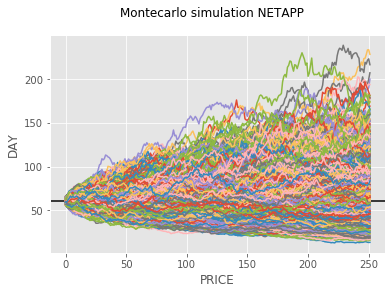

In [12]:
# Graficarlo

grafico = plt.figure()
grafico.suptitle('Montecarlo simulation NETAPP')
plt.axhline(y = last_price, color = 'black', linestyle = '-')
plt.xlabel('PRICE')
plt.ylabel('DAY')
plt.plot(simulation_df)
plt.show()

# Final Assumptions

In [13]:
#precio que vale
round(np.mean(simulation_df),2).mean()

60.85396000000003

In [14]:
# Hay una probabilidad debajo del 5% que baje y una del 5% que suba por encima 
print('5% quantile =', np.percentile(simulation_df, 5))   # returns below
print('95% quantile =', np.percentile(simulation_df,95))   #returns above

5% quantile = 37.29885887011048
95% quantile = 90.54982182248224


## MONTACARLO SIMULATION TEXAS

In [15]:
#Precios Texas
start = dt.datetime(2007,1,1)
end = dt.datetime(2019,11,30)
prices_tx = web.DataReader('TXN', 'yahoo', start, end)['Close']
prices_tx.head()

Date
2007-01-03    28.559999
2007-01-04    29.100000
2007-01-05    28.760000
2007-01-08    28.900000
2007-01-09    28.840000
Name: Close, dtype: float64

In [17]:
#MONTECARLO SIMULATION
num_simulationtx = 5000
num_days = 252

#Creo un DataFrame
simulationtx_df = pd.DataFrame()

#BLUCE

for x in range(num_simulationtx):
    count = 0
    daily_volatx = returns_tx.std()
    
    price_seriestx = []
    
    pricetx = last_pricetx*(1 + np.random.normal(0, daily_volatx))
    
    price_seriestx.append(pricetx)
    
    for day in range(num_days):
        if count == 251:
            break
        pricetx = price_seriestx[count]*(1 + np.random.normal(0, daily_volatx))
        price_seriestx.append(pricetx)
        count += 1
    simulationtx_df[x] = price_seriestx

In [18]:
#Mirada a los escenarios 
simulationtx_df.head()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,122.571437,118.064537,122.520617,116.602445,120.095365,117.873928,121.395374,123.764711,120.695738,117.534966,...,120.675930,120.531094,123.834578,123.291411,118.438758,117.653340,120.682363,118.421956,119.231089,120.641907
1,122.472216,117.034165,124.549722,115.557690,118.619581,113.960504,120.005850,124.379190,121.185177,115.065918,...,123.236337,119.750306,122.883393,121.322445,114.929498,116.601546,120.166592,121.366380,115.499251,119.873024
2,122.298012,120.009502,127.258642,114.853041,123.547120,112.174861,120.337458,127.862648,122.438028,114.946603,...,117.099545,124.777876,122.116935,121.441526,112.821939,117.756325,119.134583,119.745058,118.198305,120.998126
3,117.746238,121.323702,124.551578,112.554707,125.677768,116.647098,117.648846,130.824360,121.219415,113.635824,...,120.294541,121.562040,120.636637,120.732548,112.059727,115.670512,119.138050,118.657833,118.568246,118.475382
4,115.343328,120.426185,121.683778,114.222330,125.452785,117.222290,117.343113,128.103105,121.672952,114.033021,...,118.273760,122.796954,120.912676,118.614797,109.464742,116.471750,120.209228,116.121981,117.677613,116.314661


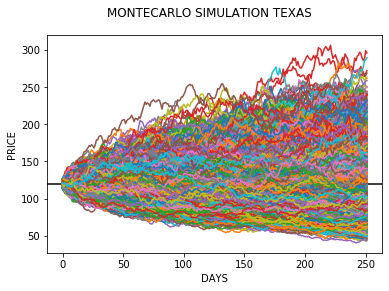

In [19]:
#GRAFICO
figura = plt.figure()
plt.suptitle('MONTECARLO SIMULATION TEXAS')
plt.xlabel('DAYS')
plt.ylabel('PRICE')
plt.axhline(y = last_pricetx, color = 'black', linestyle= '-')
plt.plot(simulationtx_df)
plt.show()

In [20]:
# Nùmero en medias de TXN
print(round(np.mean(simulationtx_df),2))

0        90.32
1       136.52
2       102.84
3       139.60
4       145.55
         ...  
4995    127.50
4996    124.89
4997    125.99
4998    102.10
4999    117.73
Length: 5000, dtype: float64


In [22]:
print('5% quantile = ', np.percentile(simulationtx_df, 5))
print('95% quantile = ', np.percentile(simulationtx_df, 95))

5% quantile =  84.07087599759652
95% quantile =  161.81202497362386


In [32]:
preciosmed = round(np.mean(simulationtx_df),2)
preciosmed.mean()

119.83748000000006

# 3. ARCH Model

In [20]:
from arch.univariate import ARX, StudentsT, GARCH

In [60]:
model1 = ARX(returns, lags=1)       # model condicional mean
model1.error = StudentsT()          # distribucion teorica de los errores
model1.volatility = GARCH(p=1, q=1) # model de la varianza condicional


In [90]:
import scipy as sps

In [91]:
t_param = sps.t.fit(returns)  # fitting a Student-t over the simulated 1 month returns
norm_param = sps.norm.fit(returns)

x = np.linspace(-.15, .15, 1000)

AttributeError: module 'scipy' has no attribute 't'

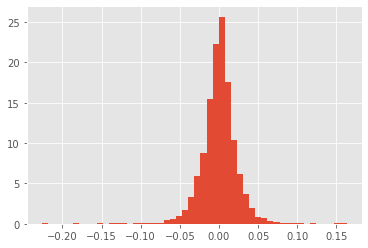

In [85]:
plt.hist(returns, bins=50, density=True)
plt.show()

In [16]:
type(prices)
t = web.DataReader('SAN','yahoo', start=start,end=end)
#t1 = t.pct_change()
#t1.hist(bins=10, range = (-0.2,0.2))
#plt.show()

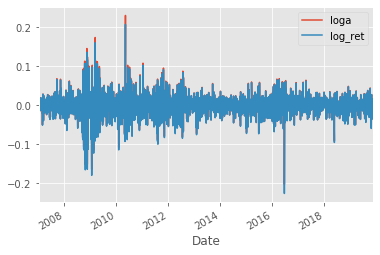

In [19]:
t['log_ret'] = np.log(t['Close']/t['Close'].shift(1))

t['loga'] = t['Close'].pct_change()
t[['loga', 'log_ret']].plot()
plt.show()

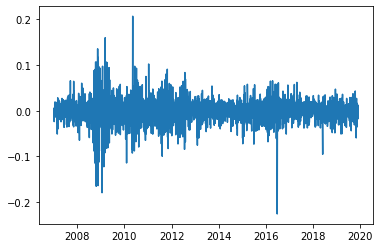

In [31]:
plt.plot(t['log_ret'])